In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

In [4]:
CURRENT_DIR = os.getcwd()

In [5]:
DATASET_DIR = 'customer-segmentation-dataset'

In [7]:
DATASET_NAME = 'Mall_Customers.csv'

In [8]:
dataset = pd.read_csv(os.path.join(CURRENT_DIR, DATASET_DIR, DATASET_NAME))

In [9]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
sex = dataset.groupby('Gender').size().to_frame('count').reset_index()

In [61]:
sex

,Gender,count
0,Female,112
1,Male,88


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

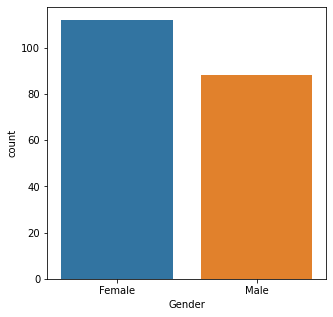

In [75]:
fig = plt.figure(figsize = (5, 5))
sns.barplot(x = 'Gender', y = 'count', data = sex)
plt.show()

In [71]:
dataset.groupby('Gender').agg({'Age' : {'min', 'max', 'mean', 'median'}})

Age                   
       median       mean max min
Gender                          
Female     35  38.098214  68  18
Male       37  39.806818  70  18

In [73]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


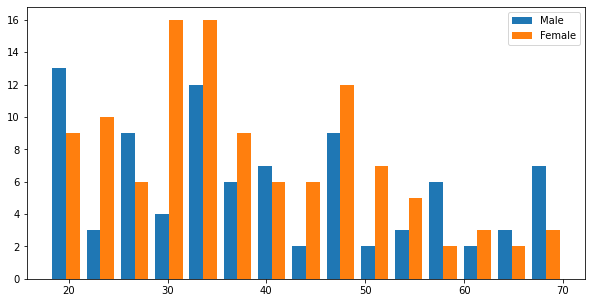

In [143]:
fig = plt.figure(figsize = (10, 5))
plt.hist((dataset[dataset['Gender'] == 'Male']['Age'], dataset[dataset['Gender'] == 'Female']['Age']), bins = 15, rwidth=0.8)
plt.legend(('Male', 'Female'), loc = 'upper right')
plt.show()

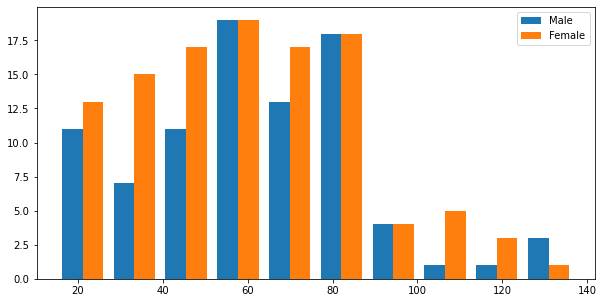

In [109]:
fig = plt.figure(figsize = (10, 5))
plt.hist((dataset[dataset['Gender'] == 'Male']['Annual Income (k$)'], dataset[dataset['Gender'] == 'Female']['Annual Income (k$)']), bins = 10, rwidth=0.8)
plt.legend(('Male', 'Female'), loc = 'upper right')
plt.show()

In [146]:
from sklearn.preprocessing import OneHotEncoder

In [167]:
one_hot = OneHotEncoder()
cat_one_hot = one_hot.fit_transform(dataset.iloc[:, [1]])

In [168]:
one_hot.categories_

[array(['Female', 'Male'], dtype=object)]

In [180]:
dataset.drop('Gender', axis = 1).join(pd.DataFrame({'Female' : cat_one_hot.toarray().astype(np.uint8)[:, 0], 'Male' : cat_one_hot.toarray().astype(np.uint8)[:, 1]}))

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [181]:
dataset_hot = pd.get_dummies(dataset)

In [182]:
dataset_hot

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.98)

In [193]:
dataset_hot_98 = pca.fit_transform(dataset_hot)

In [199]:
np.shape(dataset_hot_98)

(200, 3)

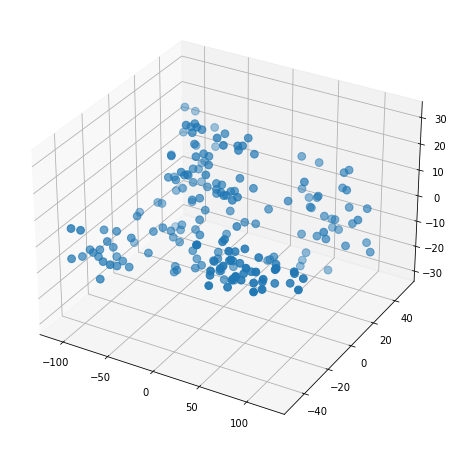

In [206]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
catter = ax.scatter(dataset_hot_98[:, 0], dataset_hot_98[:, 1], dataset_hot_98[:, 2], s=60, cmap="Set2_r")

In [192]:
sum(pca.explained_variance_ratio_)

0.9947127023113703

In [207]:
pca2 = PCA(n_components = 2)
dataset_hot_2 = pca2.fit_transform(dataset_hot)

Text(0, 0.5, 'Z2')

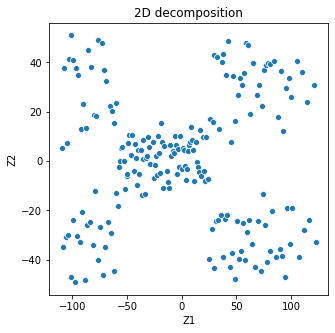

In [211]:
plt.figure(figsize = (5,5))
ax = sns.scatterplot(dataset_hot_2[:, 0], dataset_hot_2[:, 1], palette = 'deep')
plt.title("2D decomposition")
plt.xlabel("Z1")
plt.ylabel("Z2")    

In [311]:
from sklearn.cluster import KMeans

In [315]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [394]:
silhouette_score_list = list()
inertia_list = list()
silhouette_samples_list = list()
kmeans_labels_list = list()
k_s = list()

for k in range(2,11, 1):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_predict(dataset_hot)
    
    k_s.append(k)
    silhouette_score_list.append(silhouette_score(dataset_hot, kmeans.labels_))
    inertia_list.append(kmeans.inertia_)
    silhouette_samples_list.append(silhouette_samples(dataset_hot, kmeans.labels_))
    kmeans_labels_list.append(kmeans.labels_)

In [559]:
def silhouette_plot(X, n_clusters, cluster_labels, silhouette_scores, silhouette_samples):
    margin = 10
    plt.figure(figsize = (10, 5))
    ax = plt.axes()
    ax.set_xlim([-0.1, 1.0])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * margin])
    down = margin
    for i in range(n_clusters):
        values = silhouette_samples[cluster_labels == i]
        sorted_values = np.sort(values)
        
        size = np.shape(sorted_values)[0]
        up = down + size
        
        ax.fill_betweenx(np.arange(down, up), 0, sorted_values)
        ax.text(-0.05, down + 0.5 * size, str(i))
        
        down = up + margin
    
    plt.axvline(silhouette_scores, color = 'red', linestyle = ':')
    
    plt.title('silhouette plot with {} clusters'.format(n_clusters))
    
    ax.annotate('Average silhouette score {0:4.2f}'.format(silhouette_scores), xy=(silhouette_scores + .009, (len(X) + (n_clusters + 1) * margin) / 2), 
            xytext=(silhouette_scores + 0.2, (len(X) + (n_clusters + 1) * margin) / 1.5),
            arrowprops=dict(facecolor='black'))
    ax.set_xlabel('Silhouette score')
    ax.set_ylabel('Labels')
    

        
    plt.show()

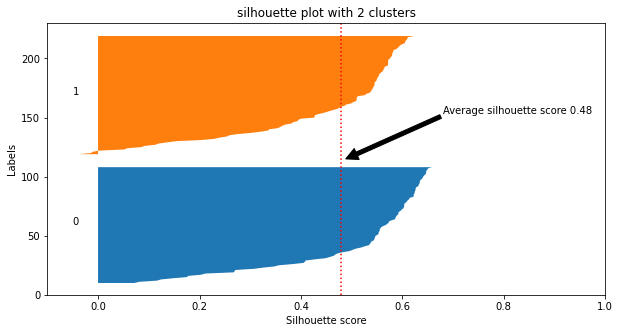

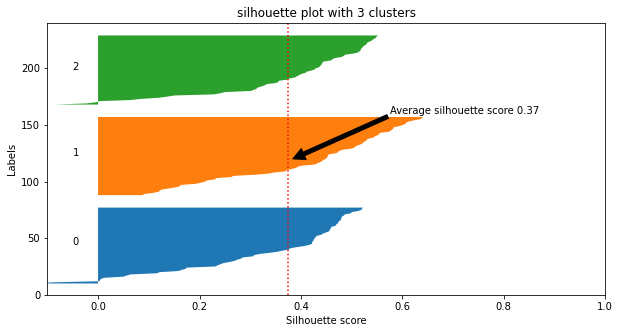

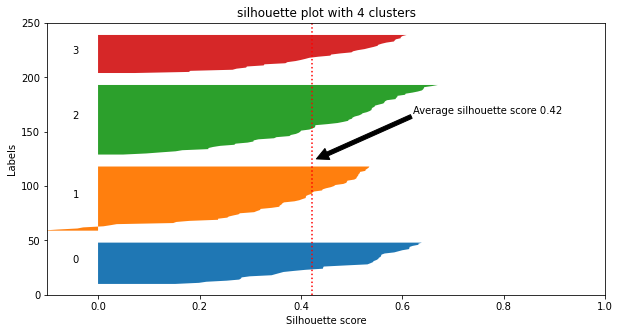

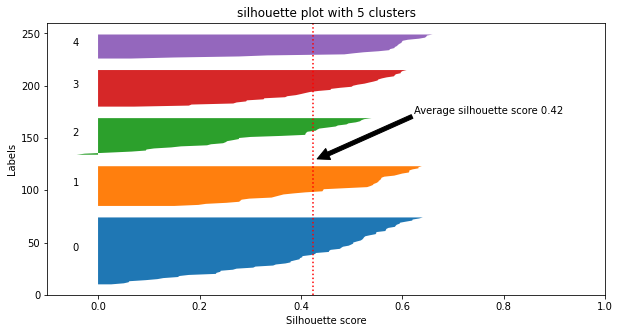

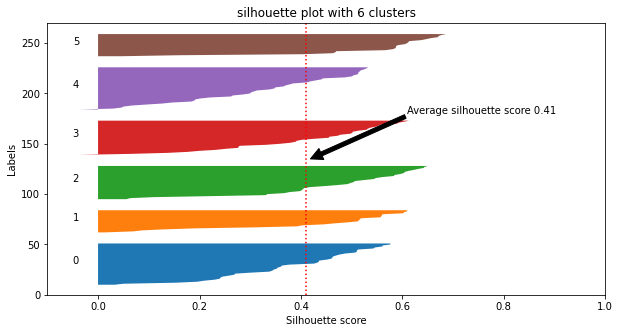

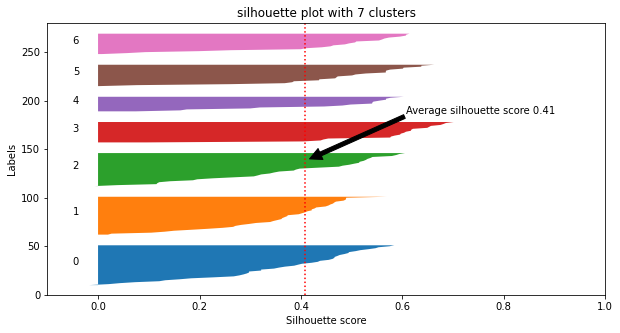

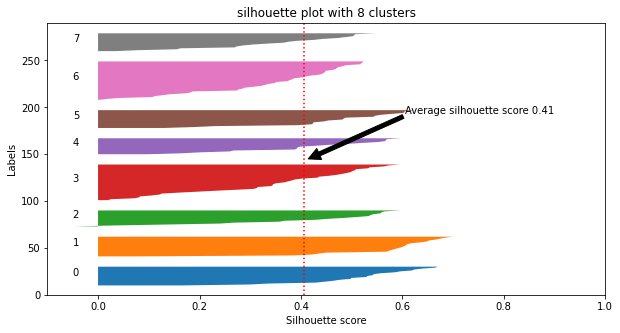

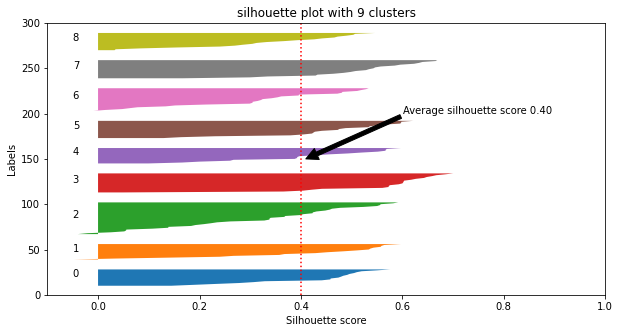

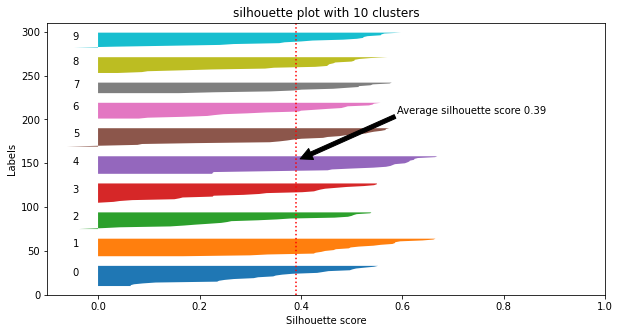

In [560]:
for k in k_s:
    index = k - min(k_s)
    silhouette_plot(dataset_hot, k, kmeans_labels_list[index], silhouette_score_list[index], silhouette_samples_list[index])

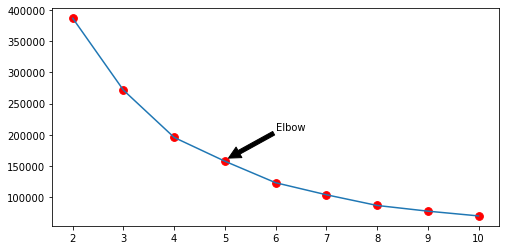

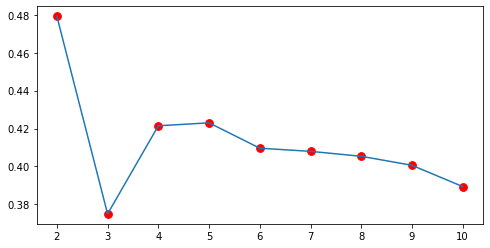

In [542]:
figure = plt.figure(figsize = (8, 4))
plt.plot(k_s, inertia_list)
plt.scatter(k_s, inertia_list, s=60, c = 'red')
plt.annotate('Elbow', xy=(5 + 0.07, inertia_list[3]+ 5000), 
            xytext=(5+1, inertia_list[3] + 50000),
            arrowprops=dict(facecolor='black'))
plt.show()

figure = plt.figure(figsize = (8, 4))
plt.plot(k_s, silhouette_score_list)
plt.scatter(k_s, silhouette_score_list, s=60, c = 'red')
plt.show()

In [563]:
kmeans_final = KMeans(n_clusters = 5)
labels = kmeans_final.fit_predict(dataset_hot)

In [593]:
def draw2D(dataset, labels, loc_str = 'upper right'): 
    plt.figure(figsize = (5,5))
    ax = sns.scatterplot(dataset[:, 0], dataset[:, 1], palette = 'deep', hue = labels)
    plt.title("2D decomposition")
    plt.xlabel("Z1")
    plt.ylabel("Z2")  
    plt.legend(loc = loc_str)

In [582]:
def draw3D(dataset, labels): 
    fig = plt.figure(figsize = (12,8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], s=60, cmap="Set2_r", c = labels)
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes", loc = 2)
    ax.add_artist(legend1)

    ax.set_xlabel("z1")
    ax.set_ylabel("z2")
    ax.set_zlabel("z3")

    ax.set_title("3D silhouette decomposition")

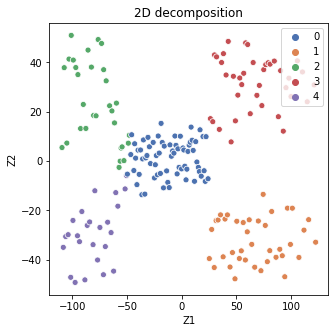

In [583]:
draw2D(dataset_hot_2, labels)

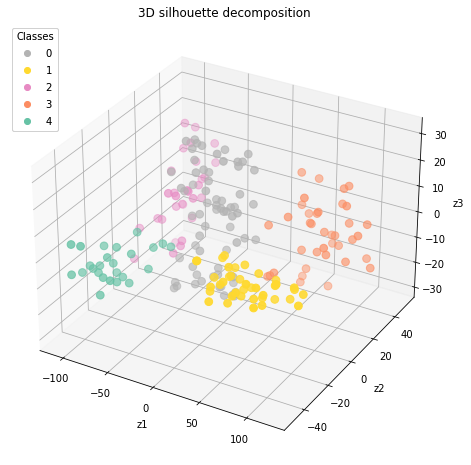

In [584]:
draw3D(dataset_hot_98, labels)

In [580]:
from sklearn.manifold import LocallyLinearEmbedding

In [585]:
lle2 = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
lle2_data = lle2.fit_transform(dataset_hot)

lle3 = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
lle3_data = lle3.fit_transform(dataset_hot)

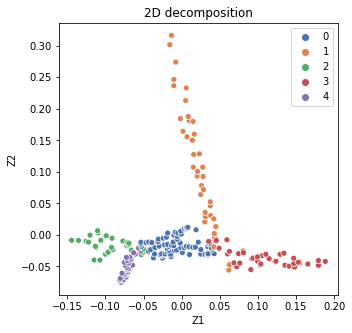

In [587]:
draw2D(lle2_data, labels)

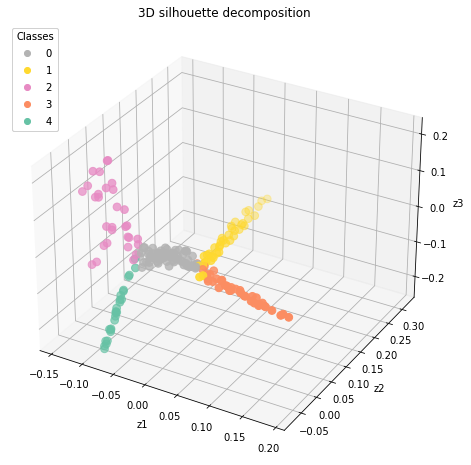

In [588]:
draw3D(lle3_data, labels)

In [589]:
from sklearn.manifold import TSNE

In [590]:
tsne2 = LocallyLinearEmbedding(n_components=2)
tsne2_data = tsne2.fit_transform(dataset_hot)

tsne3 = LocallyLinearEmbedding(n_components=3)
tsne3_data = tsne3.fit_transform(dataset_hot)

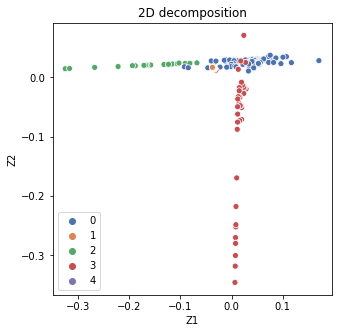

In [595]:
draw2D(tsne2_data, labels, loc_str = 'lower left')

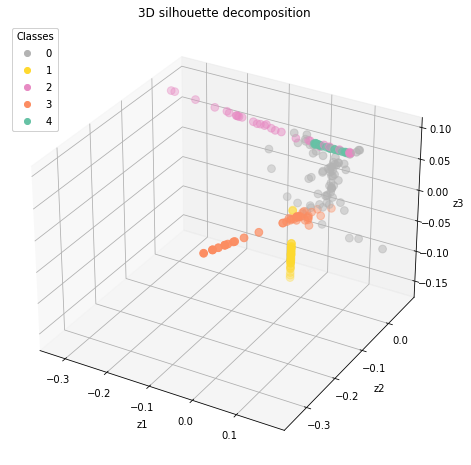

In [592]:
draw3D(tsne3_data, labels)